# Predicting the Age of an Abalone 

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
ablone_df=pd.read_csv("abalone.data.csv")

In [3]:
Profile=ProfileReport(ablone_df)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Naming the columns of the dataset

In [4]:
ablone_df.columns = ["Gender", "Length(MM)","Diameter(MM)","Height(MM)","Whole weight(Grams)","Shucked weight","Viscera weight","Shell weight","Rings"]

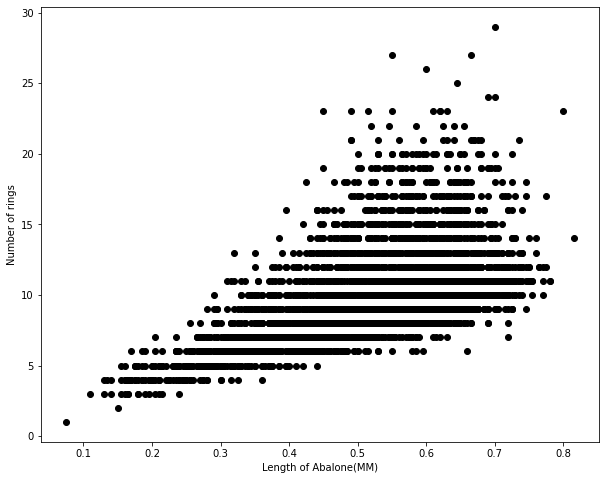

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(ablone_df['Length(MM)'], ablone_df['Rings'], c='black')
plt.xlabel('Length of Abalone(MM)')
plt.ylabel('Number of rings')
plt.show()


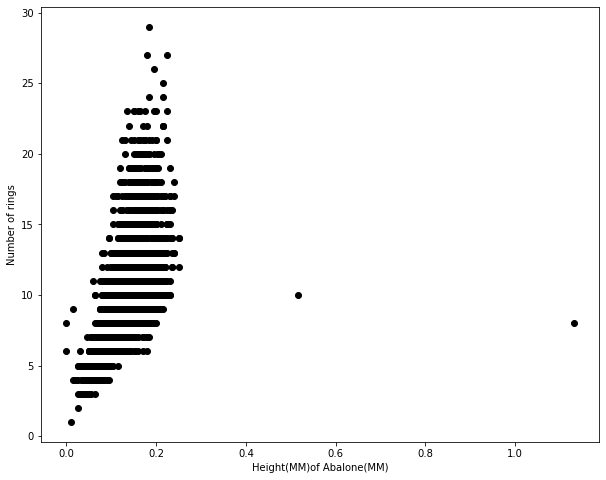

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(ablone_df['Height(MM)'], ablone_df['Rings'], c='black')
plt.xlabel('Height(MM)of Abalone(MM)')
plt.ylabel('Number of rings')
plt.show()

From the above Scatter Diagram we have two outliers we will check and see if they affect the data distribution

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
ablone_df.head()

Gender  Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  \
0      M       0.350         0.265       0.090               0.2255   
1      F       0.530         0.420       0.135               0.6770   
2      M       0.440         0.365       0.125               0.5160   
3      I       0.330         0.255       0.080               0.2050   
4      I       0.425         0.300       0.095               0.3515   

   Shucked weight  Viscera weight  Shell weight  Rings  
0          0.0995          0.0485         0.070      7  
1          0.2565          0.1415         0.210      9  
2          0.2155          0.1140         0.155     10  
3          0.0895          0.0395         0.055      7  
4          0.1410          0.0775         0.120      8

In [9]:
ablone_df.tail()

Gender  Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  \
4171      F       0.565         0.450       0.165               0.8870   
4172      M       0.590         0.440       0.135               0.9660   
4173      M       0.600         0.475       0.205               1.1760   
4174      F       0.625         0.485       0.150               1.0945   
4175      M       0.710         0.555       0.195               1.9485   

      Shucked weight  Viscera weight  Shell weight  Rings  
4171          0.3700          0.2390        0.2490     11  
4172          0.4390          0.2145        0.2605     10  
4173          0.5255          0.2875        0.3080      9  
4174          0.5310          0.2610        0.2960     10  
4175          0.9455          0.3765        0.4950     12

In [10]:
ablone_df.head()

Gender  Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  \
0      M       0.350         0.265       0.090               0.2255   
1      F       0.530         0.420       0.135               0.6770   
2      M       0.440         0.365       0.125               0.5160   
3      I       0.330         0.255       0.080               0.2050   
4      I       0.425         0.300       0.095               0.3515   

   Shucked weight  Viscera weight  Shell weight  Rings  
0          0.0995          0.0485         0.070      7  
1          0.2565          0.1415         0.210      9  
2          0.2155          0.1140         0.155     10  
3          0.0895          0.0395         0.055      7  
4          0.1410          0.0775         0.120      8

# Describing the meaning of the column names

In [11]:
#Checking if the dataset has any missing values
ablone_df.isna().sum()

Gender                 0
Length(MM)             0
Diameter(MM)           0
Height(MM)             0
Whole weight(Grams)    0
Shucked weight         0
Viscera weight         0
Shell weight           0
Rings                  0
dtype: int64

<AxesSubplot:>

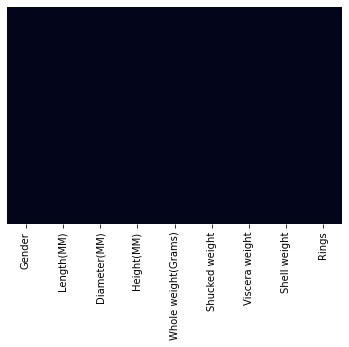

In [12]:
#Drawing a heatmap to confirm of there any missing values from the dataet
sns.heatmap(ablone_df.isnull(),yticklabels=False,cbar=False)

The data is clean and it has no missing values

array([[<AxesSubplot:title={'center':'Length(MM)'}>,
        <AxesSubplot:title={'center':'Diameter(MM)'}>,
        <AxesSubplot:title={'center':'Height(MM)'}>],
       [<AxesSubplot:title={'center':'Whole weight(Grams)'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

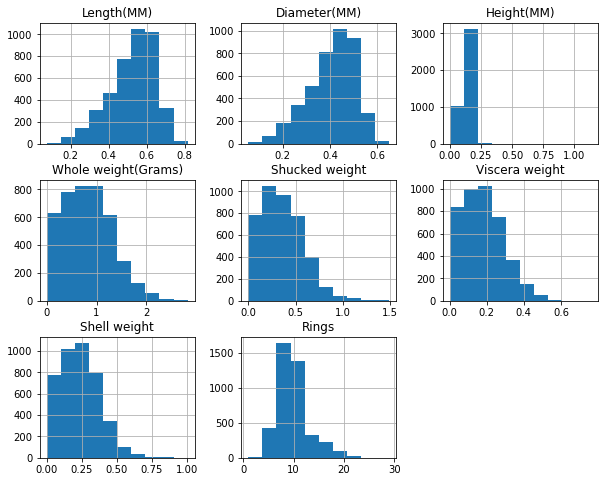

In [13]:
ablone_df.hist(figsize=(10,8))

In [14]:
ablone_df.describe()

Length(MM)  Diameter(MM)   Height(MM)  Whole weight(Grams)  \
count  4176.000000   4176.000000  4176.000000          4176.000000   
mean      0.524009      0.407892     0.139527             0.828818   
std       0.120103      0.099250     0.041826             0.490424   
min       0.075000      0.055000     0.000000             0.002000   
25%       0.450000      0.350000     0.115000             0.441500   
50%       0.545000      0.425000     0.140000             0.799750   
75%       0.615000      0.480000     0.165000             1.153250   
max       0.815000      0.650000     1.130000             2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings  
count      4176.00000     4176.000000   4176.000000  4176.000000  
mean          0.35940        0.180613      0.238852     9.932471  
std           0.22198        0.109620      0.139213     3.223601  
min           0.00100        0.000500      0.001500     1.000000  
25%           0.18600        0.093375      0.130000     8.000000  
50%           0.33600        0.171000      0.234000     9.000000  
75%           0.50200        0.253000      0.329000    11.000000  
max           1.48800        0.760000      1.005000    29.000000

In [15]:
ablone_df.columns

Index(['Gender', 'Length(MM)', 'Diameter(MM)', 'Height(MM)',
       'Whole weight(Grams)', 'Shucked weight', 'Viscera weight',
       'Shell weight', 'Rings'],
      dtype='object')

In [16]:
ablone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               4176 non-null   object 
 1   Length(MM)           4176 non-null   float64
 2   Diameter(MM)         4176 non-null   float64
 3   Height(MM)           4176 non-null   float64
 4   Whole weight(Grams)  4176 non-null   float64
 5   Shucked weight       4176 non-null   float64
 6   Viscera weight       4176 non-null   float64
 7   Shell weight         4176 non-null   float64
 8   Rings                4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [17]:
ablone_df.shape

(4176, 9)

In [18]:
ablone_df.dtypes

Gender                  object
Length(MM)             float64
Diameter(MM)           float64
Height(MM)             float64
Whole weight(Grams)    float64
Shucked weight         float64
Viscera weight         float64
Shell weight           float64
Rings                    int64
dtype: object

In [19]:
#Checing if the dataset has any duplicates
ablone_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4171    False
4172    False
4173    False
4174    False
4175    False
Length: 4176, dtype: bool

# Main Aim of this project is to predict the Age of an Ablone given the above factors

Lets think like Data nerds now

In [20]:
# calculate the correlation between columns
correlation = ablone_df.corr()
# display the correlation matrix
print(correlation)

                     Length(MM)  Diameter(MM)  Height(MM)  \
Length(MM)             1.000000      0.986813    0.827552   
Diameter(MM)           0.986813      1.000000    0.833705   
Height(MM)             0.827552      0.833705    1.000000   
Whole weight(Grams)    0.925255      0.925452    0.819209   
Shucked weight         0.897905      0.893159    0.774957   
Viscera weight         0.903010      0.899726    0.798293   
Shell weight           0.897697      0.905328    0.817326   
Rings                  0.557123      0.575005    0.558109   

                     Whole weight(Grams)  Shucked weight  Viscera weight  \
Length(MM)                      0.925255        0.897905        0.903010   
Diameter(MM)                    0.925452        0.893159        0.899726   
Height(MM)                      0.819209        0.774957        0.798293   
Whole weight(Grams)             1.000000        0.969403        0.966372   
Shucked weight                  0.969403        1.000000        0.9319

In [21]:
ablone_df.head()

Gender  Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  \
0      M       0.350         0.265       0.090               0.2255   
1      F       0.530         0.420       0.135               0.6770   
2      M       0.440         0.365       0.125               0.5160   
3      I       0.330         0.255       0.080               0.2050   
4      I       0.425         0.300       0.095               0.3515   

   Shucked weight  Viscera weight  Shell weight  Rings  
0          0.0995          0.0485         0.070      7  
1          0.2565          0.1415         0.210      9  
2          0.2155          0.1140         0.155     10  
3          0.0895          0.0395         0.055      7  
4          0.1410          0.0775         0.120      8

Let's  check for unique characters in the columns

In [22]:
ablone_df["Gender"].unique()

array(['M', 'F', 'I'], dtype=object)

In [23]:
ablone_df["Length(MM)"].unique()

array([0.35 , 0.53 , 0.44 , 0.33 , 0.425, 0.545, 0.475, 0.55 , 0.525,
       0.43 , 0.49 , 0.535, 0.47 , 0.5  , 0.355, 0.365, 0.45 , 0.38 ,
       0.565, 0.615, 0.56 , 0.58 , 0.59 , 0.605, 0.575, 0.68 , 0.665,
       0.705, 0.465, 0.54 , 0.24 , 0.205, 0.21 , 0.39 , 0.46 , 0.325,
       0.52 , 0.4  , 0.485, 0.405, 0.445, 0.245, 0.505, 0.595, 0.31 ,
       0.555, 0.57 , 0.6  , 0.62 , 0.625, 0.695, 0.36 , 0.51 , 0.435,
       0.495, 0.385, 0.515, 0.37 , 0.27 , 0.375, 0.7  , 0.71 , 0.265,
       0.305, 0.345, 0.65 , 0.28 , 0.175, 0.17 , 0.635, 0.645, 0.61 ,
       0.725, 0.235, 0.315, 0.225, 0.64 , 0.63 , 0.585, 0.42 , 0.335,
       0.415, 0.275, 0.295, 0.075, 0.13 , 0.11 , 0.16 , 0.23 , 0.3  ,
       0.32 , 0.655, 0.66 , 0.455, 0.2  , 0.165, 0.19 , 0.74 , 0.34 ,
       0.675, 0.745, 0.685, 0.69 , 0.67 , 0.29 , 0.26 , 0.395, 0.41 ,
       0.22 , 0.255, 0.735, 0.155, 0.48 , 0.195, 0.25 , 0.18 , 0.15 ,
       0.215, 0.73 , 0.715, 0.765, 0.185, 0.285, 0.72 , 0.75 , 0.755,
       0.78 , 0.815,

In [24]:
ablone_df["Diameter(MM)"].unique()

array([0.265, 0.42 , 0.365, 0.255, 0.3  , 0.415, 0.425, 0.37 , 0.44 ,
       0.38 , 0.35 , 0.405, 0.355, 0.4  , 0.28 , 0.34 , 0.295, 0.32 ,
       0.275, 0.48 , 0.45 , 0.445, 0.475, 0.47 , 0.56 , 0.525, 0.55 ,
       0.29 , 0.335, 0.175, 0.15 , 0.375, 0.245, 0.41 , 0.36 , 0.31 ,
       0.385, 0.19 , 0.345, 0.325, 0.495, 0.39 , 0.235, 0.51 , 0.465,
       0.535, 0.435, 0.43 , 0.395, 0.305, 0.195, 0.54 , 0.26 , 0.2  ,
       0.33 , 0.23 , 0.285, 0.52 , 0.455, 0.205, 0.13 , 0.5  , 0.515,
       0.485, 0.46 , 0.545, 0.57 , 0.575, 0.16 , 0.21 , 0.49 , 0.25 ,
       0.27 , 0.505, 0.215, 0.225, 0.055, 0.1  , 0.09 , 0.12 , 0.53 ,
       0.145, 0.22 , 0.6  , 0.58 , 0.585, 0.565, 0.555, 0.185, 0.165,
       0.125, 0.59 , 0.14 , 0.11 , 0.155, 0.315, 0.24 , 0.17 , 0.18 ,
       0.105, 0.595, 0.135, 0.625, 0.63 , 0.61 , 0.65 , 0.62 , 0.605,
       0.095, 0.115, 0.615])

In [25]:
ablone_df["Height(MM)"].unique()

array([0.09 , 0.135, 0.125, 0.08 , 0.095, 0.15 , 0.14 , 0.11 , 0.145,
       0.1  , 0.13 , 0.085, 0.155, 0.165, 0.185, 0.18 , 0.175, 0.2  ,
       0.105, 0.045, 0.055, 0.05 , 0.12 , 0.07 , 0.16 , 0.06 , 0.17 ,
       0.195, 0.19 , 0.115, 0.075, 0.065, 0.215, 0.21 , 0.23 , 0.205,
       0.22 , 0.04 , 0.01 , 0.03 , 0.035, 0.225, 0.24 , 0.235, 0.02 ,
       0.025, 0.015, 0.   , 0.515, 0.25 , 1.13 ])

In [26]:
ablone_df["Whole weight(Grams)"].unique()

array([0.2255, 0.677 , 0.516 , ..., 1.176 , 1.0945, 1.9485])

In [27]:
ablone_df["Shucked weight"].unique()

array([0.0995, 0.2565, 0.2155, ..., 0.727 , 0.137 , 0.9455])

In [28]:
ablone_df["Shell weight"].unique()

array([0.07  , 0.21  , 0.155 , 0.055 , 0.12  , 0.33  , 0.26  , 0.165 ,
       0.32  , 0.135 , 0.19  , 0.205 , 0.185 , 0.24  , 0.115 , 0.13  ,
       0.1   , 0.075 , 0.085 , 0.27  , 0.2   , 0.305 , 0.3   , 0.285 ,
       0.28  , 0.295 , 0.46  , 0.35  , 0.455 , 0.49  , 0.125 , 0.34  ,
       0.145 , 0.09  , 0.02  , 0.012 , 0.015 , 0.14  , 0.15  , 0.045 ,
       0.245 , 0.16  , 0.11  , 0.22  , 0.17  , 0.025 , 0.175 , 0.485 ,
       0.275 , 0.425 , 0.38  , 0.315 , 0.345 , 0.675 , 0.58  , 0.36  ,
       0.44  , 0.4   , 0.255 , 0.39  , 0.48  , 0.25  , 0.335 , 0.235 ,
       0.105 , 0.18  , 0.31  , 0.03  , 0.08  , 0.54  , 0.78  , 0.41  ,
       0.129 , 0.062 , 0.068 , 0.028 , 0.1355, 0.048 , 0.063 , 0.117 ,
       0.0925, 0.2475, 0.2665, 0.4465, 0.2425, 0.174 , 0.1565, 0.042 ,
       0.0125, 0.01  , 0.325 , 0.45  , 0.355 , 0.635 , 1.005 , 0.815 ,
       0.725 , 0.85  , 0.65  , 0.76  , 0.62  , 0.59  , 0.035 , 0.05  ,
       0.57  , 0.29  , 0.195 , 0.465 , 0.23  , 0.06  , 0.435 , 0.04  ,
      

In [29]:
ablone_df["Rings"].unique()

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

From the column descriptions, The ring column,value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [30]:
ablone_df.tail()

Gender  Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  \
4171      F       0.565         0.450       0.165               0.8870   
4172      M       0.590         0.440       0.135               0.9660   
4173      M       0.600         0.475       0.205               1.1760   
4174      F       0.625         0.485       0.150               1.0945   
4175      M       0.710         0.555       0.195               1.9485   

      Shucked weight  Viscera weight  Shell weight  Rings  
4171          0.3700          0.2390        0.2490     11  
4172          0.4390          0.2145        0.2605     10  
4173          0.5255          0.2875        0.3080      9  
4174          0.5310          0.2610        0.2960     10  
4175          0.9455          0.3765        0.4950     12

In [31]:
ablone_df.isnull().sum()

Gender                 0
Length(MM)             0
Diameter(MM)           0
Height(MM)             0
Whole weight(Grams)    0
Shucked weight         0
Viscera weight         0
Shell weight           0
Rings                  0
dtype: int64

# Detailed EDA

From the provided Measured Factors lets Explore the following

Questions to answer via EDA

array([[<AxesSubplot:title={'center':'Length(MM)'}>,
        <AxesSubplot:title={'center':'Diameter(MM)'}>,
        <AxesSubplot:title={'center':'Height(MM)'}>],
       [<AxesSubplot:title={'center':'Whole weight(Grams)'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

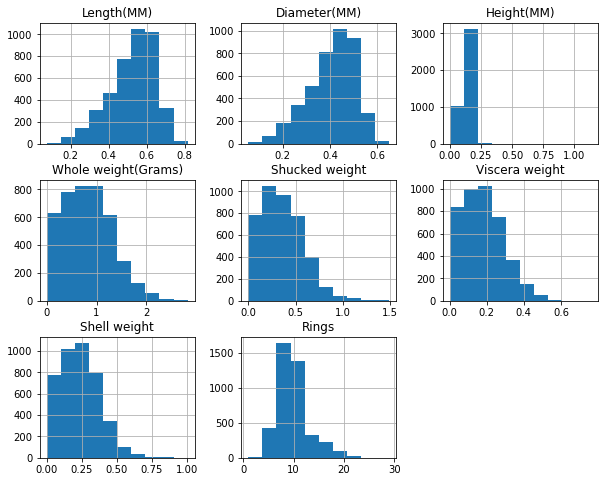

In [33]:
ablone_df.hist(figsize=(10,8))

In [34]:
# Create the age column
ablone_df['age'] = ablone_df['Rings'] + 1.5

In [35]:
ablone_df.head()

Gender  Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  \
0      M       0.350         0.265       0.090               0.2255   
1      F       0.530         0.420       0.135               0.6770   
2      M       0.440         0.365       0.125               0.5160   
3      I       0.330         0.255       0.080               0.2050   
4      I       0.425         0.300       0.095               0.3515   

   Shucked weight  Viscera weight  Shell weight  Rings   age  
0          0.0995          0.0485         0.070      7   8.5  
1          0.2565          0.1415         0.210      9  10.5  
2          0.2155          0.1140         0.155     10  11.5  
3          0.0895          0.0395         0.055      7   8.5  
4          0.1410          0.0775         0.120      8   9.5

<AxesSubplot:xlabel='age', ylabel='Count'>

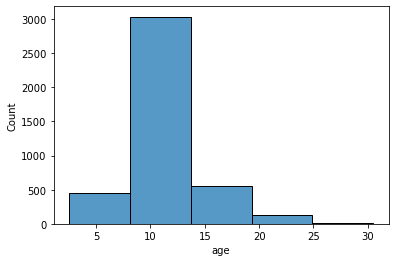

In [36]:
sns.histplot(data=ablone_df, x= "age", bins = 5)

From the above it is evident that most of the abalones exam9ned are of the ages between 9 and 14

<AxesSubplot:xlabel='Length(MM)', ylabel='Count'>

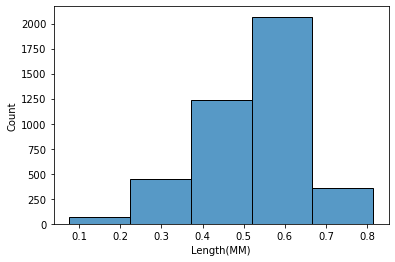

In [37]:
sns.histplot(data=ablone_df, x= "Length(MM)", bins = 5)

From the above it is evident that most of the abalones are of the length between 0.4 and 0.7

<AxesSubplot:xlabel='Whole weight(Grams)', ylabel='Count'>

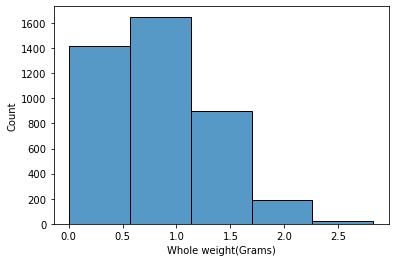

In [38]:
sns.histplot(data=ablone_df, x= "Whole weight(Grams)", bins = 5)

Most abalones ore of the weight 0.0 to 1.5 grams

<AxesSubplot:ylabel='None'>

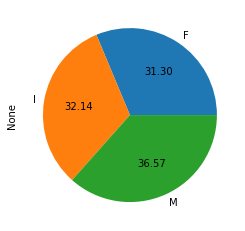

In [39]:
ablone_df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

Most of the abalones examined are Male abalones

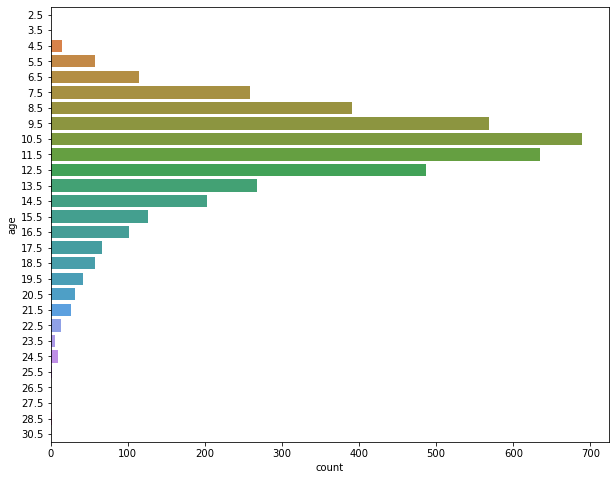

In [40]:
# countplot to compare the Shucked weight of the abalones

fig = plt.figure(figsize=(10,8)) # set figure size
ax = sns.countplot(y="age", data=ablone_df, palette="husl")
plt.show()
#In this example, the figure method is called with figsize=(10, 6), which sets the figure size to 10 inches wide by 6 inches tall. The countplot method is then called on the returned object, ax. Finally, the show method of the matplotlib library is called to display the plot.






Majority of the abalones have their ages ranging between 5 and 11

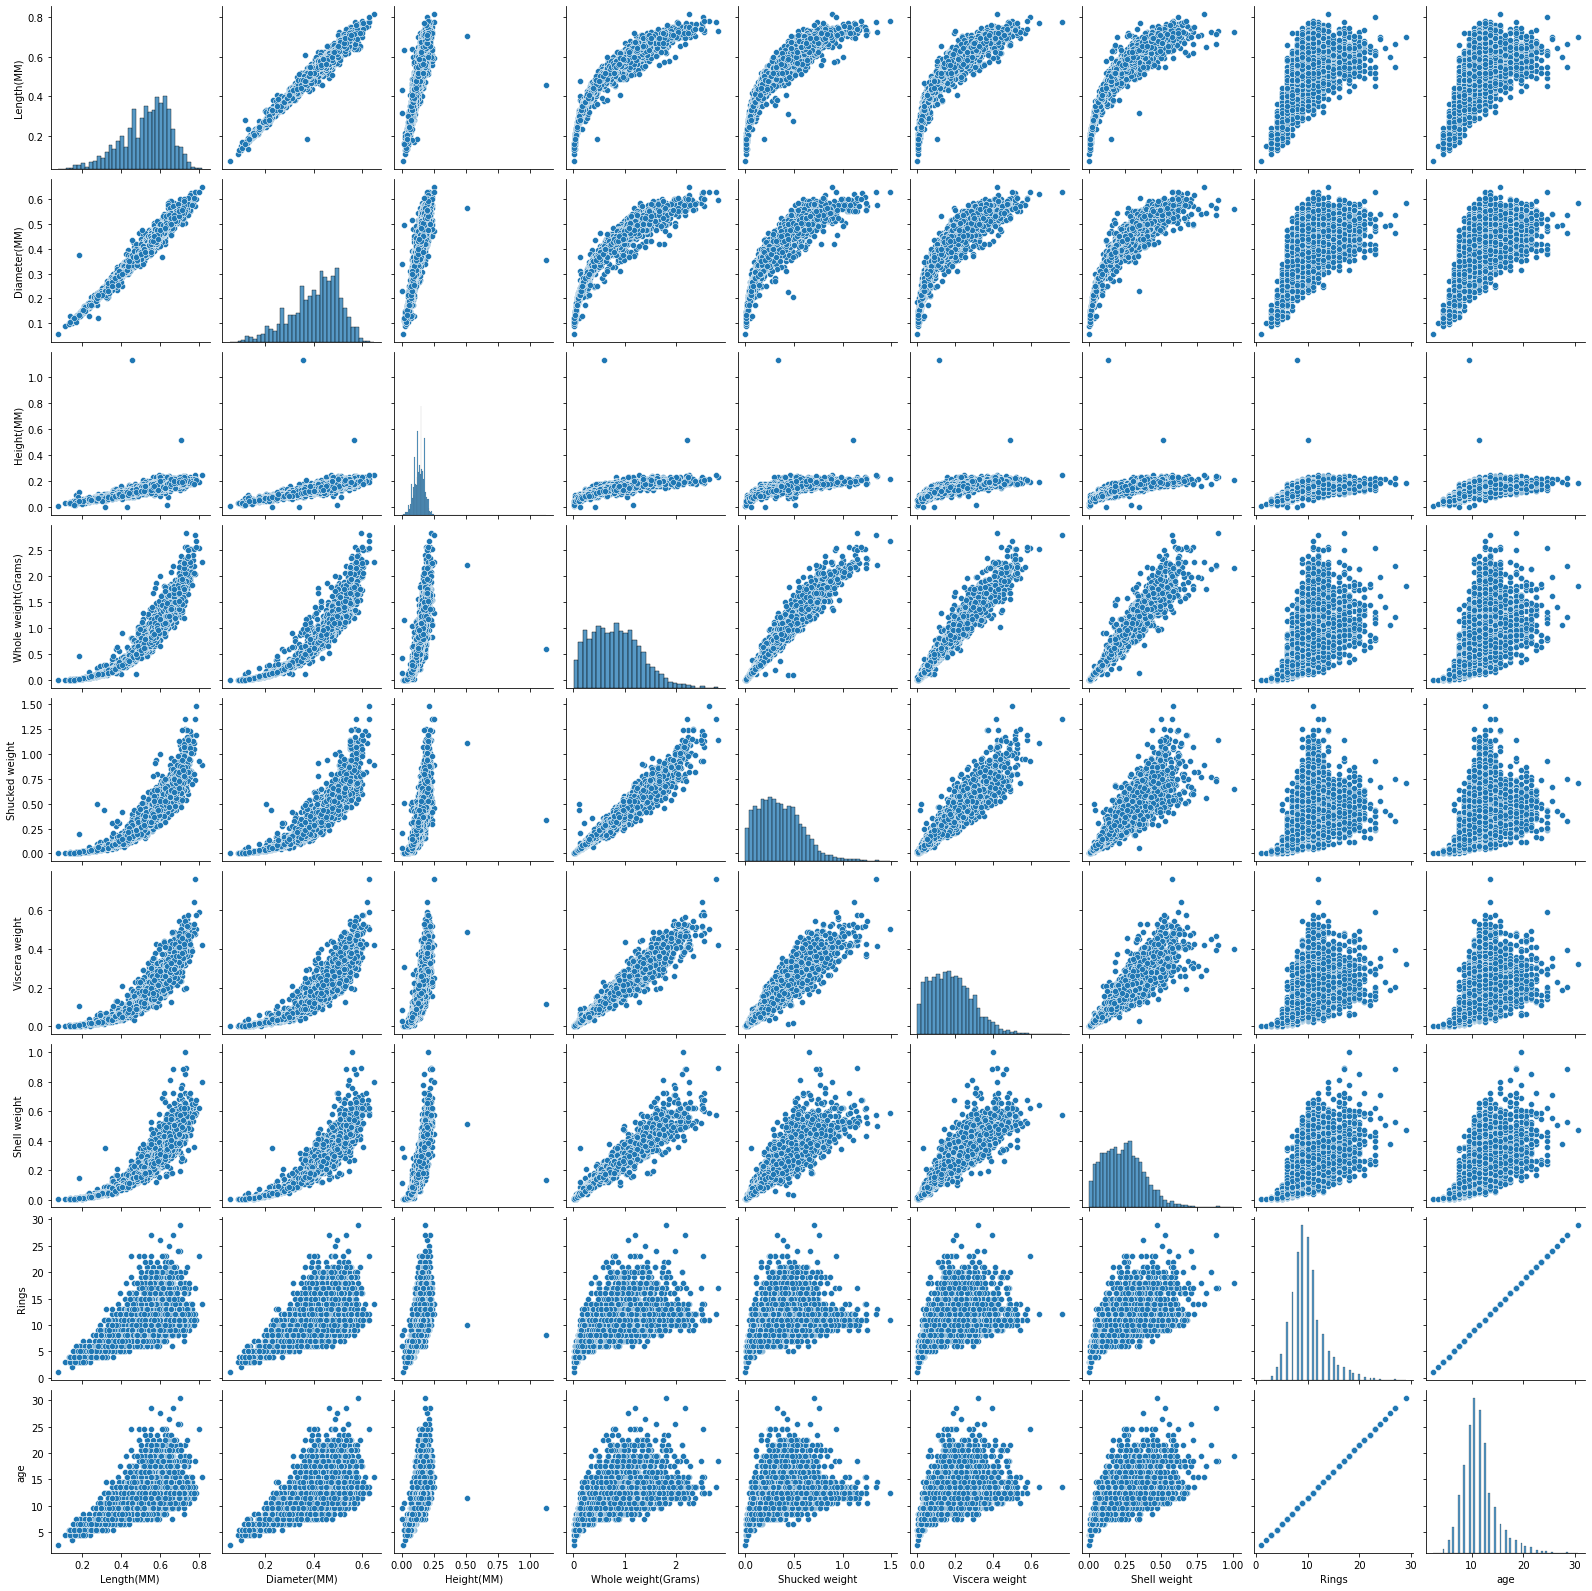

In [41]:
sns.pairplot(ablone_df)

Drawing a pairplot to make it easier to understand the relationships between the variables in the data set

# Machine learning And feature Engineering

One-Hot Encoding

In [42]:
encoded_data=pd.get_dummies(ablone_df)
encoded_data.head()

Length(MM)  Diameter(MM)  Height(MM)  Whole weight(Grams)  Shucked weight  \
0       0.350         0.265       0.090               0.2255          0.0995   
1       0.530         0.420       0.135               0.6770          0.2565   
2       0.440         0.365       0.125               0.5160          0.2155   
3       0.330         0.255       0.080               0.2050          0.0895   
4       0.425         0.300       0.095               0.3515          0.1410   

   Viscera weight  Shell weight  Rings   age  Gender_F  Gender_I  Gender_M  
0          0.0485         0.070      7   8.5         0         0         1  
1          0.1415         0.210      9  10.5         1         0         0  
2          0.1140         0.155     10  11.5         0         0         1  
3          0.0395         0.055      7   8.5         0         1         0  
4          0.0775         0.120      8   9.5         0         1         0

In [43]:
print(encoded_data.shape)

(4176, 12)


# Modelling

Split the datasets

In [44]:
training_set=encoded_data.iloc[:4099,:]
validation_set=encoded_data.iloc[4099:, :]
print(training_set.shape)
print(validation_set.shape)

(4099, 12)
(77, 12)


# Importing the modellling libraries

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Baseline Model:Multiple linear Regression

Defining the features

In [46]:
x=training_set[['Length(MM)','Height(MM)']]
y=training_set['Rings'].values.reshape(-1,1)

x_val=validation_set[['Length(MM)','Height(MM)']]
y_val=validation_set['Rings'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

Initiailizing the model

In [47]:
lin_reg=LinearRegression()

lin_reg.fit(x_train,y_train)

#Test the RMSE
lin_reg_pred=lin_reg.predict(x_test)
test_rmse=mean_squared_error(y_test, lin_reg_pred,squared=False)
print(f'TEST RMSE: {test_rmse}')

#Validation RMSE
lin_reg_pred_val=lin_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,lin_reg_pred_val, squared=False)
print(f'validation RMSE:{val_rmse}')

TEST RMSE: 2.74048909194233
validation RMSE:1.5206337466330053


The best way to improve linear regression is to use regularization

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [49]:
ridge=Ridge()
parameters= {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(x_train, y_train);
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1}
6.974640022541306


# Retraining the model

In [50]:
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(x_train, y_train)
ridge_reg_pred= ridge_reg.predict(x_test)

#Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared= False)
print(f'TEST RMSE:{test_rmse}')

#VALIDATION RMSE
ridge_reg_pred_val = ridge_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val,squared=False)
print(f'validation RMSE:{val_rmse}')

TEST RMSE:2.7593028990539086
validation RMSE:1.5191674237050428


# Multiple Linear Regression regularization(Lasso)

In [51]:
from sklearn.linear_model import Lasso

In [58]:
lasso= Lasso(tol=0.05)
parameters ={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 0.01}
7.0340796069323


In [59]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(x_train, y_train)

lasso_reg_pred = lasso_reg.predict(x_test)

#Test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared= False)
print(f'TEST RMSE:{test_rmse}')

#VALIDATION RMSE
lasso_reg_pred_val = lasso_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val,squared=False)
print(f'validation RMSE:{val_rmse}')

TEST RMSE:2.7838557130194816
validation RMSE:1.5131651630696255


In [60]:
x = training_set.drop(['Diameter(MM)','Shucked weight',
                       'Viscera weight','Shell weight', 'Rings', 'age','Shell weight'],axis = 1)
y = training_set['Rings'].values.reshape(-1,1)

x_val = validation_set.drop(['Diameter(MM)','Shucked weight',
                       'Viscera weight','Shell weight', 'Rings', 'age','Shell weight'],axis = 1)
y_val = validation_set['Rings'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [69]:
rf = RandomForestRegressor()
parameters = {'n_estimators':[int(x) for x in np.linspace(100, 1000, 10)]}

rf_regressor = GridSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv = 5)
rf_regressor.fit(x_train, y_train.ravel())
print(-rf_regressor.best_score_)

7.136316318473121


# Bagging

In [77]:
bg = BaggingRegressor()
parameters ={
    'n_estimators':[int(x) for x in np.linspace(10, 100, 10)],
    'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)]

}

bg_regressor = GridSearchCV(bg, parameters, scoring = 'neg_mean_squared_error', cv = 5)
bg_regressor.fit(x_train, y_train.ravel())

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_samples': [0.1, 0.2, 0.30000000000000004, 0.4,
                                         0.5, 0.6, 0.7000000000000001, 0.8, 0.9,
                                         1.0],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='neg_mean_squared_error')

In [79]:
bg_reg = BaggingRegressor(n_estimators =670,max_samples = 0.1)
bg_reg.fit(x_train, y_train.ravel())

bg_reg_pred = bg_reg.predict(x_test)

#TEST RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared = False)
print(f'TEST RMSE:{test_rmse}')

#Validation RMSE
bg_reg_pred_val = bg_reg.predict(x_val)
val_rmse =mean_squared_error(y_val, bg_reg_pred_val, squared = False)
print(f'validation RMSE:{val_rmse}')

TEST RMSE:2.5746460934267748
validation RMSE:1.6923715692099068


# LIGHTGBM

In [80]:
import lightgbm as lgb

In [81]:
params = {
    'learning_rate':'0.01'
}
train_data = lgb.Dataset(x_train.values, label = y_train.ravel())

In [83]:
lgb_reg = lgb.train(params, train_data, 100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 3689, number of used features: 6
[LightGBM] [Info] Start training from score 9.933857


In [85]:
lgb_reg_pred = lgb_reg.predict(x_test)

#TEST RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred,squared =False)
print(f'TEST RMSE:{test_rmse}')

#VALIDATION RMSE
lgb_reg_pred_val = lgb_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, lgb_reg_pred_val, squared = False)
print(f'validation RMSE:{val_rmse}')

TEST RMSE:2.738824238764399
validation RMSE:1.4814351047377747


# Compiling the results

In [90]:
rmse_compilation = {
    'model':['Lightgbm','Bagging',
              'Lasso Regression','Ridge Regression','Linear Regression'],
'RMSE':[1.4814, 1.6923, 1.5131, 1.5192, 1.5206]
}
rmse_df = pd.DataFrame(data =rmse_compilation)
rmse_df.sort_values(by = ['RMSE'], ascending=True)
    


model    RMSE
0           Lightgbm  1.4814
2   Lasso Regression  1.5131
3   Ridge Regression  1.5192
4  Linear Regression  1.5206
1            Bagging  1.6923